##(3) BA 305 Final Project Predicting Diabetes- Run PCA on 10 variables dataset which were selected based on features importance

### It takes about **25 minutes** to run all the codes in this file

### **Helpful Tip:** Use table of contents to navigate through this file

## Introduction 

### To improve models predictive power, we decided to run PCA analysis on the 10 variables dataset that selected base on features importance. We furter shrink the dataset and fet a new dataset. We will run all classifications on this new dataset again to see how the accuracy score changes. 

##Objective

### To improve models' predictive power by further shrink the dataset



## Data prepossessing

In [ ]:
# Import the python packages...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
# Import some useful packages from scikit-learn
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree

In [ ]:
# Import the dataset that we found on Kaggle
# Link of the dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
# we uploaded the CSV file on github and it is more convenient for us to import datset every time 

url = 'https://raw.githubusercontent.com/JimSong66/BA-305/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
diabetes_9pdf = pd.read_csv(url)
diabetes_9pdf.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  

[5 rows x 22 columns]

In [ ]:
# The dataset already cleaned by the author so, we don't have much cleaning work to do
# But we will double check the data to make sure it is cleaned
# Look at the dataset's features datatype
diabetes_9pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
# get rid of the space within each column's name
diabetes_9pdf.columns = ('Diabetes_binary','HighBP',	'HighChol',	'CholCheck',	'BMI',	'Smoker',	'Stroke',	'HeartDiseaseorAttack',	'PhysActivity',
                       'Fruits',	'Veggies',	'HvyAlcoholConsump',	'AnyHealthcare',	'NoDocbcCost',	'GenHlth',	'MentHlth',	'PhysHlth',	'DiffWalk',	'Sex',	'Age',	'Education',	'Income')

In [ ]:
#remove any missing data in the dataset
di_9pmdf = diabetes_9pdf.dropna(how='any')
di_9pmdf = di_9pmdf.reset_index(drop=True)

In [ ]:
# first create a list of all the columns to be dropped based on feature importance
cols = ['CholCheck',	'Smoker',	'Stroke',		
                       'Fruits',	'Veggies',	'HvyAlcoholConsump',	'AnyHealthcare', 'PhysActivity','NoDocbcCost','MentHlth', 'Sex','Education']

# then use the dataframe drop() command to drop them
diabetes_9pdf = diabetes_9pdf.drop(cols, axis = 1)
diabetes_9pdf.head()

Diabetes_binary  HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  \
0              0.0     1.0       0.0  26.0                   0.0      3.0   
1              0.0     1.0       1.0  26.0                   0.0      3.0   
2              0.0     0.0       0.0  26.0                   0.0      1.0   
3              0.0     1.0       1.0  28.0                   0.0      3.0   
4              0.0     0.0       0.0  29.0                   0.0      2.0   

   PhysHlth  DiffWalk   Age  Income  
0      30.0       0.0   4.0     8.0  
1       0.0       0.0  12.0     8.0  
2      10.0       0.0  13.0     8.0  
3       3.0       0.0  11.0     8.0  
4       0.0       0.0   8.0     8.0

###Visualization - Heat Map

In [ ]:
# Correlation matrix of this dataframe
corr_mat = diabetes_9pdf.corr()
corr_mat

Diabetes_binary    HighBP  HighChol       BMI  \
Diabetes_binary              1.000000  0.381516  0.289213  0.293373   
HighBP                       0.381516  1.000000  0.316515  0.241019   
HighChol                     0.289213  0.316515  1.000000  0.131309   
BMI                          0.293373  0.241019  0.131309  1.000000   
HeartDiseaseorAttack         0.211523  0.210750  0.181187  0.060355   
GenHlth                      0.407612  0.320540  0.237778  0.267888   
PhysHlth                     0.213081  0.173922  0.142610  0.161862   
DiffWalk                     0.272646  0.234784  0.162043  0.246094   
Age                          0.278738  0.338132  0.240338 -0.038648   
Income                      -0.224449 -0.187657 -0.107777 -0.124878   

                      HeartDiseaseorAttack   GenHlth  PhysHlth  DiffWalk  \
Diabetes_binary                   0.211523  0.407612  0.213081  0.272646   
HighBP                            0.210750  0.320540  0.173922  0.234784   
HighChol                          0.181187  0.237778  0.142610  0.162043   
BMI                               0.060355  0.267888  0.161862  0.246094   
HeartDiseaseorAttack              1.000000  0.275868  0.198416  0.232611   
GenHlth                           0.275868  1.000000  0.552757  0.476639   
PhysHlth                          0.198416  0.552757  1.000000  0.487976   
DiffWalk                          0.232611  0.476639  0.487976  1.000000   
Age                               0.221878  0.155624  0.084852  0.195265   
Income                           -0.146748 -0.382969 -0.279326 -0.343245   

                           Age    Income  
Diabetes_binary       0.278738 -0.224449  
HighBP                0.338132 -0.187657  
HighChol              0.240338 -0.107777  
BMI                  -0.038648 -0.124878  
HeartDiseaseorAttack  0.221878 -0.146748  
GenHlth               0.155624 -0.382969  
PhysHlth              0.084852 -0.279326  
DiffWalk              0.195265 -0.343245  
Age                   1.000000 -0.130140  
Income               -0.130140  1.000000

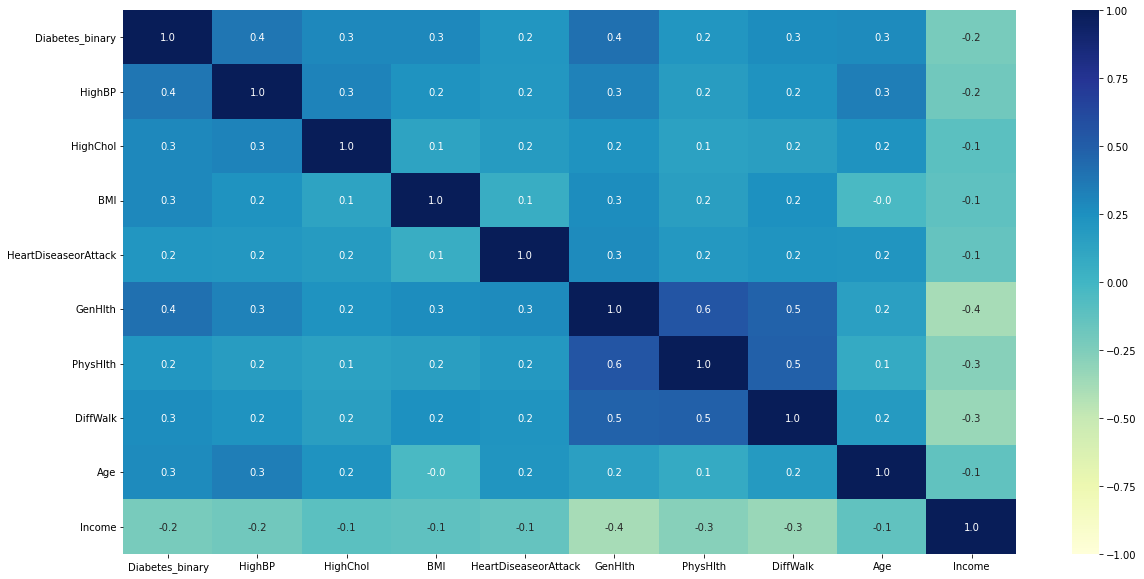

In [ ]:
# Heat map
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,annot=True, fmt =".1f", vmin=-1, vmax=1,cmap='YlGnBu')

## PCA Analysis 

In [ ]:
# drop the output column (diabetes_binary) for the PCA analysis
diabetespca = diabetes_9pdf.drop(['Diabetes_binary'],axis=1).values
diabetespca

array([[ 1.,  0., 26., ...,  0.,  4.,  8.],
       [ 1.,  1., 26., ...,  0., 12.,  8.],
       [ 0.,  0., 26., ...,  0., 13.,  8.],
       ...,
       [ 1.,  1., 25., ...,  1., 13.,  4.],
       [ 1.,  1., 18., ...,  1., 11.,  4.],
       [ 1.,  1., 25., ...,  0.,  9.,  2.]])

In [ ]:
# Scaling Standardization of the array (0 mean, unit variance) is done via the sklearn.preprocessing scale() function
scaled_9parray = preprocessing.scale(diabetespca)
print(scaled_9parray)

# It is better to convert the array back to a dataframe to help with visualization of the data
scaled_9pdf = pd.DataFrame(scaled_9parray)
print(scaled_9pdf)

[[ 0.88020109 -1.05279808 -0.54217564 ... -0.58155367 -1.60723742
   1.05815996]
 [ 0.88020109  0.94984976 -0.54217564 ... -0.58155367  1.19768093
   1.05815996]
 [-1.13610402 -1.05279808 -0.54217564 ... -0.58155367  1.54829572
   1.05815996]
 ...
 [ 0.88020109  0.94984976 -0.68274544 ...  1.71953175  1.54829572
  -0.78076781]
 [ 0.88020109  0.94984976 -1.66673405 ...  1.71953175  0.84706614
  -0.78076781]
 [ 0.88020109  0.94984976 -0.68274544 ... -0.58155367  0.14583655
  -1.70023169]]
              0         1         2         3         4         5         6  \
0      0.880201 -1.052798 -0.542176 -0.416470  0.146304  2.404008 -0.581554   
1      0.880201  0.949850 -0.542176 -0.416470  0.146304 -0.577451 -0.581554   
2     -1.136104 -1.052798 -0.542176 -0.416470 -1.649743  0.416369 -0.581554   
3      0.880201  0.949850 -0.261036 -0.416470  0.146304 -0.279305 -0.581554   
4     -1.136104 -1.052798 -0.120466 -0.416470 -0.751719 -0.577451 -0.581554   
...         ...       ...       ..

In [ ]:
#Checking the Standardization result to see whether it has a mean of zero and variance of 1
pd.DataFrame({
              'mean':scaled_9pdf.mean(),
              'stdev': scaled_9pdf.std()
              }).transpose().round(3)

0    1    2    3    4    5    6    7    8
mean  -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0
stdev  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [ ]:
# Run PCA after scaling and we arbitrary use the number of components to be 9
# 9 components will explain 100% of the dataset
pcs = PCA(n_components= 9)
pcs.fit(scaled_9pdf)

# view the importance of principal components
pcsSummary_9pdf = pd.DataFrame({
            'Proportion of variance': pcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
            })
pcsSummary_9pdf.transpose().round(3)

0      1      2      3      4      5      6  \
Proportion of variance  0.326  0.142  0.112  0.091  0.084  0.079  0.066   
Cumulative proportion   0.326  0.468  0.580  0.671  0.755  0.834  0.901   

                            7      8  
Proportion of variance  0.055  0.045  
Cumulative proportion   0.955  1.000

In [ ]:
# Give shortcut on columnsnames which we will use later 
columnsnames = diabetes_9pdf.drop('Diabetes_binary',axis=1).columns
columnsnames

Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')

In [ ]:
# Component matrix (correlations) of the 9 components from PCA analysis
pd.DataFrame(pcs.components_.transpose(), index = columnsnames).round(2)



0     1     2     3     4     5     6     7     8
HighBP                0.34 -0.39  0.31 -0.17  0.20 -0.15 -0.64 -0.37  0.10
HighChol              0.26 -0.42  0.26  0.05 -0.67  0.42  0.24 -0.05  0.03
BMI                   0.23  0.20  0.76  0.13  0.34 -0.05  0.32  0.27  0.14
HeartDiseaseorAttack  0.27 -0.23 -0.31  0.74  0.37  0.28  0.01 -0.03  0.08
GenHlth               0.46  0.21 -0.03  0.04 -0.13 -0.00 -0.28  0.38 -0.71
PhysHlth              0.39  0.35 -0.19  0.11 -0.36 -0.28 -0.20  0.21  0.62
DiffWalk              0.42  0.23 -0.11 -0.03 -0.01 -0.28  0.44 -0.67 -0.19
Age                   0.24 -0.57 -0.26 -0.29  0.16 -0.41  0.34  0.40  0.03
Income               -0.32 -0.20  0.21  0.55 -0.29 -0.62 -0.05 -0.04 -0.18

In [ ]:
# To view the eigenvalue of each component
#Eigenvalues are given by the PCA explained_variance_ function
eig=pcs.explained_variance_.round(2)
print(eig)

[2.93 1.28 1.01 0.82 0.76 0.71 0.6  0.49 0.4 ]


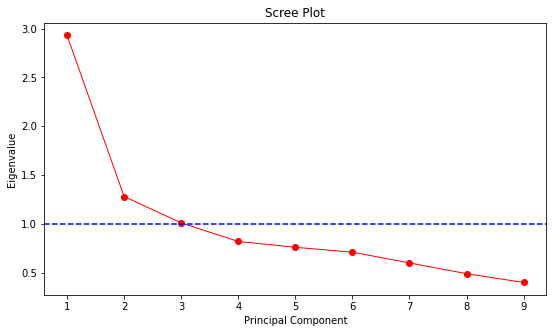

In [ ]:
# scree plot of eigenvalues
# define the x values, which is a simple array between 1 and 10
xvals = np.arange(1,10,step=1);
#figure size
plt.figure(figsize=(9,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add X and Y labels and title
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue to see which component's eigenvalue is greater than 1
plt.axhline(y=1, color='b', linestyle='--')

In [ ]:
# However, we didn't use the latent root criterion because of the low percentage of variance explained
# Keeping the first 6 components based on Percentage of Variance Criterion
# fit() function runs the PCA and shows the % of var explained
# fit_transform() function runs the PCA and shows the actual PCA values (the components score)
pcs = PCA(n_components=6)
principalComponents = pcs.fit_transform(scaled_9pdf)

# make the output more readable by creating a new dataframe
principal9pDF = pd.DataFrame(
        principalComponents.round(2), 
        columns = ['F1','F2','F3','F4','F5','F6']
        )
principal9pDF

F1    F2    F3    F4    F5    F6
0     -0.18  1.52 -0.03  0.75 -0.92 -1.18
1     -0.15 -1.95  0.31 -0.30 -0.72 -0.64
2     -1.70 -0.56 -1.05 -0.11  0.14 -1.61
3     -0.05 -1.60  0.56 -0.12 -0.79 -0.60
4     -1.99  0.36 -0.11  0.37  0.25 -0.63
...     ...   ...   ...   ...   ...   ...
70687  0.47  1.16  0.71 -0.85 -0.10  2.44
70688  0.72 -0.80 -1.11  1.80  0.32  0.63
70689  3.03 -1.54 -1.47  0.68  0.62  0.50
70690  1.46 -0.88 -1.12 -1.38 -0.76  0.05
70691  0.81 -1.65 -0.95  0.53  1.03  2.31

[70692 rows x 6 columns]

In [ ]:
# Check component scores are orthogonal 
principal9pDF.corr().round(4)

F1   F2   F3   F4   F5   F6
F1  1.0 -0.0 -0.0 -0.0 -0.0 -0.0
F2 -0.0  1.0  0.0  0.0 -0.0 -0.0
F3 -0.0  0.0  1.0  0.0 -0.0  0.0
F4 -0.0  0.0  0.0  1.0 -0.0  0.0
F5 -0.0 -0.0 -0.0 -0.0  1.0 -0.0
F6 -0.0 -0.0  0.0  0.0 -0.0  1.0

In [ ]:
# merge component scores with the original dataframe (10 variable selection dataset based on feature importance)
# we will use the concatenate, concat() function for this task

diabetes_9pdf_aug = pd.concat([diabetes_9pdf, principal9pDF], axis=1)
diabetes_9pdf_aug

Diabetes_binary  HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  \
0                  0.0     1.0       0.0  26.0                   0.0      3.0   
1                  0.0     1.0       1.0  26.0                   0.0      3.0   
2                  0.0     0.0       0.0  26.0                   0.0      1.0   
3                  0.0     1.0       1.0  28.0                   0.0      3.0   
4                  0.0     0.0       0.0  29.0                   0.0      2.0   
...                ...     ...       ...   ...                   ...      ...   
70687              1.0     0.0       1.0  37.0                   0.0      4.0   
70688              1.0     0.0       1.0  29.0                   1.0      2.0   
70689              1.0     1.0       1.0  25.0                   1.0      5.0   
70690              1.0     1.0       1.0  18.0                   0.0      4.0   
70691              1.0     1.0       1.0  25.0                   1.0      2.0   

       PhysHlth  DiffWalk   Age  Income    F1    F2    F3    F4    F5    F6  
0          30.0       0.0   4.0     8.0 -0.18  1.52 -0.03  0.75 -0.92 -1.18  
1           0.0       0.0  12.0     8.0 -0.15 -1.95  0.31 -0.30 -0.72 -0.64  
2          10.0       0.0  13.0     8.0 -1.70 -0.56 -1.05 -0.11  0.14 -1.61  
3           3.0       0.0  11.0     8.0 -0.05 -1.60  0.56 -0.12 -0.79 -0.60  
4           0.0       0.0   8.0     8.0 -1.99  0.36 -0.11  0.37  0.25 -0.63  
...         ...       ...   ...     ...   ...   ...   ...   ...   ...   ...  
70687       0.0       0.0   6.0     1.0  0.47  1.16  0.71 -0.85 -0.10  2.44  
70688       0.0       1.0  10.0     6.0  0.72 -0.80 -1.11  1.80  0.32  0.63  
70689       0.0       1.0  13.0     4.0  3.03 -1.54 -1.47  0.68  0.62  0.50  
70690       0.0       1.0  11.0     4.0  1.46 -0.88 -1.12 -1.38 -0.76  0.05  
70691       0.0       0.0   9.0     2.0  0.81 -1.65 -0.95  0.53  1.03  2.31  

[70692 rows x 16 columns]

In [ ]:
# Drop not needed columns in the diabetes9 dataframe and only keep the PCA components
X3 = diabetes_9pdf_aug.drop(['Diabetes_binary','HighBP','HighChol','BMI',
                     'HeartDiseaseorAttack','GenHlth','PhysHlth','DiffWalk','Age','Income'],axis=1).values #axis = 1 means the entire column
y3 = diabetes_9pdf_aug['Diabetes_binary'].values

# check whether you drop the columns or not
X3.shape

(70692, 6)

## KNN model on the new dataset

In [ ]:
# Use train/test split function to split the new dataset into train and testing sets
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3, test_size=0.3, random_state=2, stratify=y3)
print('Training set:', X3_train.shape, 'Testing set:', X3_test.shape)

Training set: (49484, 6) Testing set: (21208, 6)


In [ ]:
# Choosing the best k for the validation set
# using a 'for' loop and range(start, stop, step)
results = []
for k in range(1, 500, 20):

    print('iteration', k, "of", 500)
    knn = KNeighborsClassifier(n_neighbors=k).fit(X3_train, y3_train)
    
    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y3_test, knn.predict(X3_test))
        })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

iteration 1 of 500
iteration 21 of 500
iteration 41 of 500
iteration 61 of 500
iteration 81 of 500
iteration 101 of 500
iteration 121 of 500
iteration 141 of 500
iteration 161 of 500
iteration 181 of 500
iteration 201 of 500
iteration 221 of 500
iteration 241 of 500
iteration 261 of 500
iteration 281 of 500
iteration 301 of 500
iteration 321 of 500
iteration 341 of 500
iteration 361 of 500
iteration 381 of 500
iteration 401 of 500
iteration 421 of 500
iteration 441 of 500
iteration 461 of 500
iteration 481 of 500


k  accuracy
0     1  0.662580
1    21  0.739108
2    41  0.742126
3    61  0.743116
4    81  0.743257
5   101  0.744672
6   121  0.743870
7   141  0.743634
8   161  0.743729
9   181  0.743069
10  201  0.742503
11  221  0.742739
12  241  0.742691
13  261  0.741890
14  281  0.742314
15  301  0.742126
16  321  0.741748
17  341  0.742644
18  361  0.741513
19  381  0.741088
20  401  0.741465
21  421  0.740947
22  441  0.741324
23  461  0.740994
24  481  0.740522

In [ ]:
# Further narrow down the K's range to [81,121] to find the optimal K value 
results = []
for k in range(81, 121, 1):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X3_train, y3_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y3_test, knn.predict(X3_test))
        })
results_df = pd.DataFrame(results)
results_df


k  accuracy
0    81  0.743257
1    82  0.743352
2    83  0.743870
3    84  0.744389
4    85  0.744813
5    86  0.744295
6    87  0.744672
7    88  0.744295
8    89  0.744672
9    90  0.744342
10   91  0.744059
11   92  0.743304
12   93  0.743965
13   94  0.744200
14   95  0.744106
15   96  0.743823
16   97  0.743823
17   98  0.744106
18   99  0.744672
19  100  0.744578
20  101  0.744672
21  102  0.744483
22  103  0.744059
23  104  0.744719
24  105  0.745002
25  106  0.744342
26  107  0.744389
27  108  0.744106
28  109  0.743917
29  110  0.743682
30  111  0.744012
31  112  0.744247
32  113  0.744436
33  114  0.743634
34  115  0.744200
35  116  0.743493
36  117  0.743917
37  118  0.743682
38  119  0.744059
39  120  0.743823

In [ ]:
# Run the k-NN model with k=105 
knn = KNeighborsClassifier(n_neighbors=105)

# Specify the training features (X_train) and the outcome they lead to (y_train)
# Fit the data and use the model to make prediction 

knn.fit(X3_train, y3_train)
y3_pred = knn.predict(X3_test)
print('Accuracy:', accuracy_score(y3_test, y3_pred))

Accuracy: 0.7450018860807243


## Decision Tree - Build the Full tree

In [ ]:
# Build "Full Tree" by using the DecisionTreeClassifier() function to run decision tree model
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X3_train,y3_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# To see how many nodes are in the full-tree
print('Number of nodes', full_clf.tree_.node_count)

Number of nodes 21029


In [ ]:
# Text representation of full tree
text_representation = tree.export_text(full_clf)

### **Warning**: The lines of code below take about **9 minutes** to run!!!

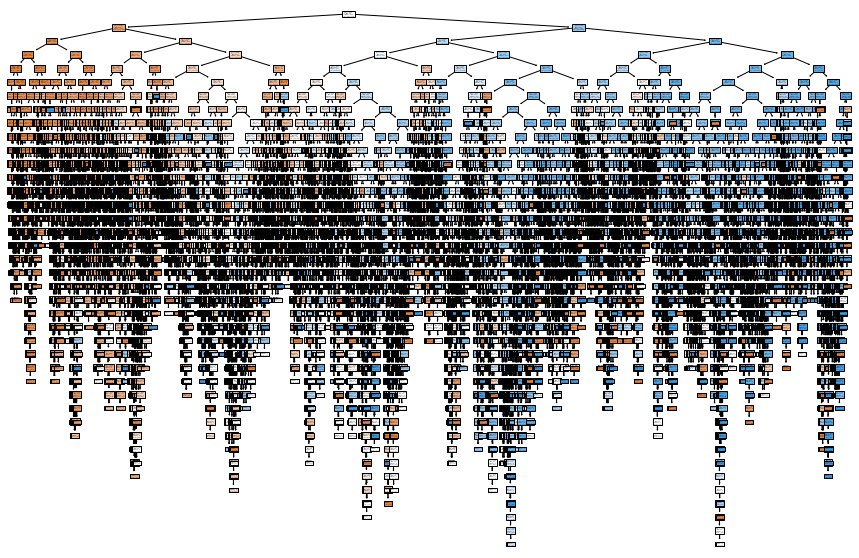

In [ ]:
# Visualize the full tree via "plot_tree" function

# First, re-size the figure via matplotlib(otherwise it will be too small)
plt.figure(figsize=(15,10))

# Then call plot_tree() function
# the 'filled' option generates colors in the nodes
tree.plot_tree(full_clf, filled=True);

### Decision Tree - Pruning the full tree

### **Warning**: The lines of code below take about **6 minutes** to run!!!

In [ ]:
# We create lists of all the values of penalty parameters that we want to search over
# This is called 'creating a grid'
# The parameters:
# max_depth : maximum number of splits
# min_samples_split :  The minimum number of samples required to split a node
# min_samples_leaf : Minimum # of samples inside of every leaf
# min_impurity_decrease : minimum absolute 'error' improvement to justify a split
# criterion : gini (default) or entropy

param_grid = {
    'max_depth': [ 4, 6, 8,10], 
    'min_samples_leaf': [120,150,160,170,180,190,200],
    'min_impurity_decrease': [0,0.0005,0.0001,0.001,0.002], 
    'min_samples_split': [4,5,6,7,8,10],
}

# Then, use the GridSearchCV function which combines gridsearch with 
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring = 'accuracy')
gridSearch.fit(X3_train, y3_train)

# to see the best accuracy score and the values of each parameter
print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

Best accuracy:  0.7369250021380283
Parameter values to achieve best accuracy:  {'max_depth': 8, 'min_impurity_decrease': 0, 'min_samples_leaf': 120, 'min_samples_split': 4}


In [ ]:
# Use the optimal parameters to pruned the tree 

clf = DecisionTreeClassifier(
      max_depth=8, 
      min_samples_split = 4, 
      min_samples_leaf = 120,
      min_impurity_decrease = 0,
      criterion = 'gini')
clf.fit(X3_train, y3_train)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0,
                       min_samples_leaf=120, min_samples_split=4)

In [ ]:
# Naming the F1, F2, F3, F3, F5, F6 components 
fnames = ['Poor general health especially poor legs','Young adult with depression','Obese/ Overweight','Wealthy Heart disease Patients','Sedentary Lifestyle','Limited Expenditure on Health Care']


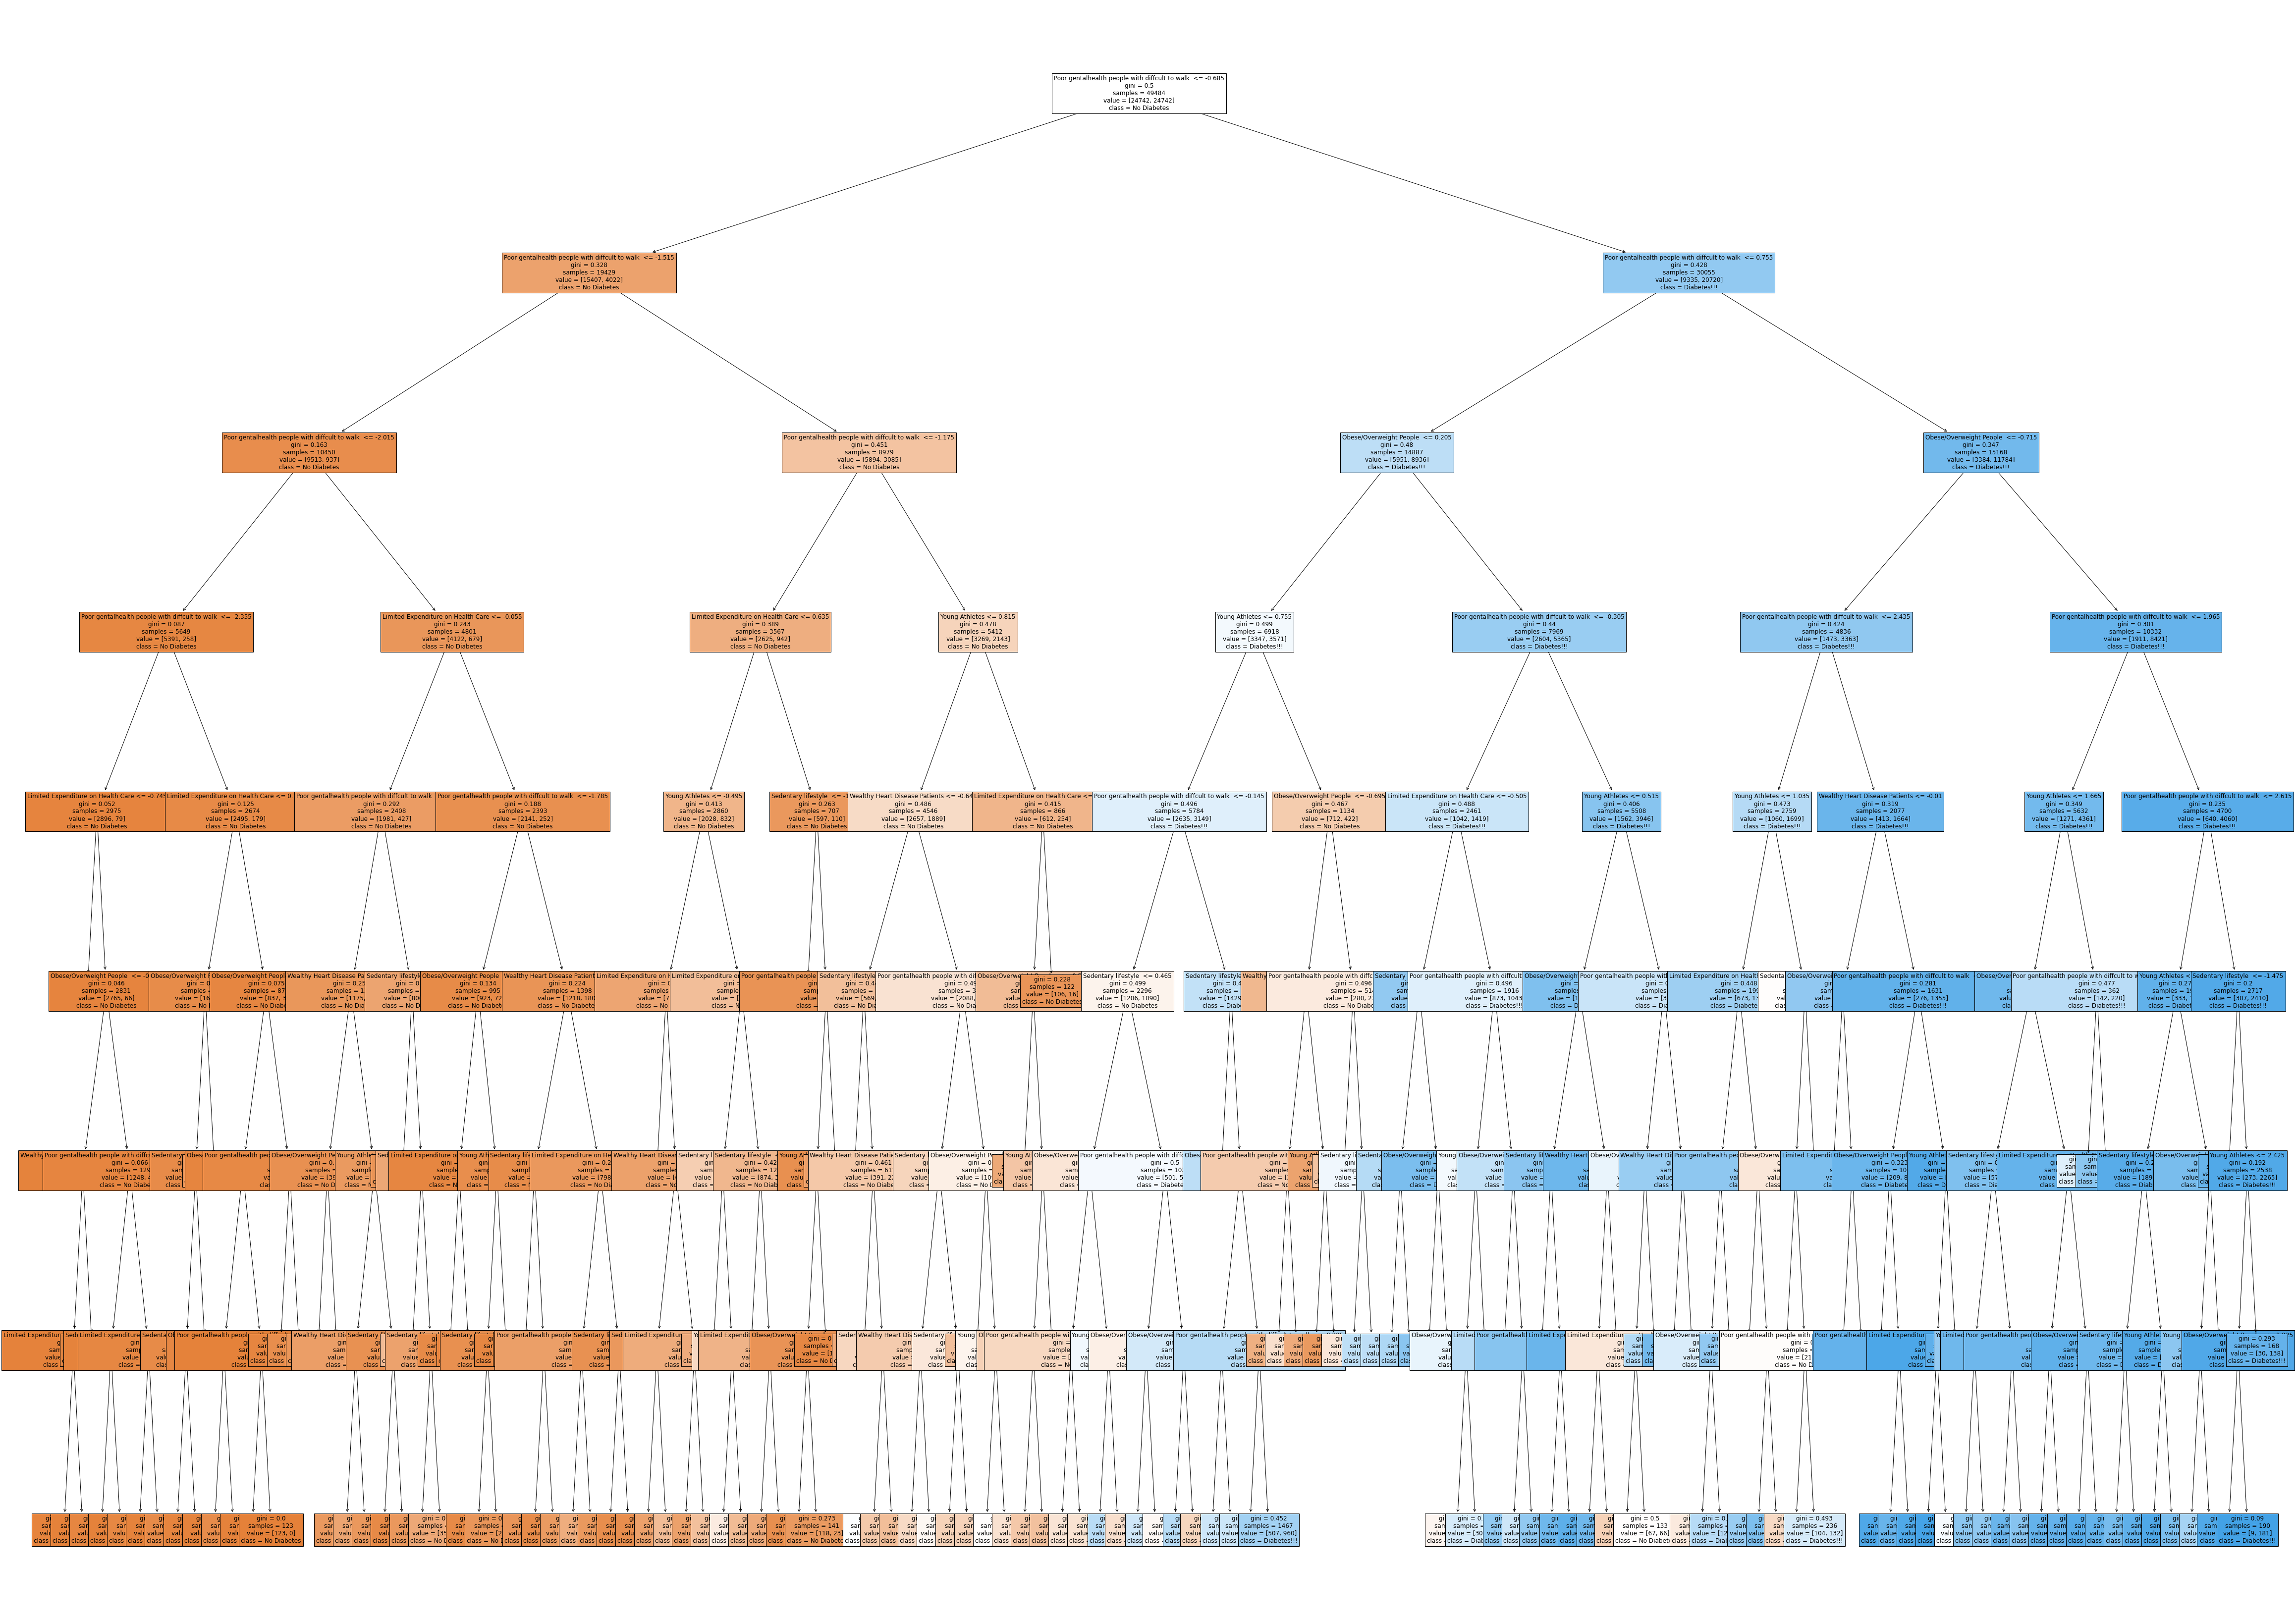

In [ ]:
# Plot the reduced tree
fig = plt.figure(figsize=(80,60))
# define class names
cnames = ['No Diabetes','Diabetes!!!'] 
#Use the names of the 6 components for feature names
tree.plot_tree(clf, fontsize=12,feature_names=fnames, class_names=cnames, filled=True);

In [ ]:
# for better visualization of the pruned tree
# import the required package
%%capture
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

In [ ]:
# Plotting the diagram
viz = dtreeviz(clf, 
               x_data=X3_train,
               y_data=y3_train,
               target_name='Diabetes?',
               feature_names= fnames, 
               class_names=['No Diabetes', 'Diabetes!!!'],
               title="Decision Tree on Diabetes Survey",
               scale=1.2); 
viz

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


## Random Forest

In [ ]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

### **Warning**: The lines of code below take about **4 minutes** to run!!!

In [ ]:
# Run the RF classifier, specifying the number of trees to generate = 5000
# when using random forest classifiers, given they randomize over the data and the feature columns
# include some penalty parameters
rf = RandomForestClassifier(
    n_estimators=5000, 
    random_state=0, 
    criterion='gini', 
    min_samples_leaf = 150)
rf.fit(X3_train, y3_train)

RandomForestClassifier(min_samples_leaf=150, n_estimators=5000, random_state=0)

In [ ]:
# The accuracy score, the confusion_matrix and the classification report on the random forest model
print(accuracy_score(y3_test, rf.predict(X3_test)))
print(confusion_matrix(y3_test, rf.predict(X3_test)))
print(classification_report(y3_test,rf.predict(X3_test)))

0.7428800452659374
[[7346 3258]
 [2195 8409]]
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73     10604
         1.0       0.72      0.79      0.76     10604

    accuracy                           0.74     21208
   macro avg       0.75      0.74      0.74     21208
weighted avg       0.75      0.74      0.74     21208



## Logistic Regression

In [ ]:
#importing required packages for Logistic Regression
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [ ]:
# Use the LogisticRegression() function
# Run the Logistic Regression model on the dataset
lr = LogisticRegression(penalty="none", solver='lbfgs')
lr.fit(X3_train, y3_train)

LogisticRegression(penalty='none')

In [ ]:
# Use the logistic regression model to get the predicted y value
y_lrpred = lr.predict(X3_test)

In [ ]:
# Get the Confusion Matrix, accuracy score and classification report values
print(confusion_matrix(y3_test,y_lrpred))
print(accuracy_score(y3_test, y_lrpred))
print(classification_report(y3_test,y_lrpred))

[[7640 2964]
 [2616 7988]]
0.7368917389664278
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     10604
         1.0       0.73      0.75      0.74     10604

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



In [ ]:
# Extract regressed probabilities using predict_probability
# we need this step to help us on changing the cut-off value manually
p_pred=lr.predict_proba(X3_test)[:,1]
np.round(p_pred,3)

array([0.121, 0.145, 0.794, ..., 0.475, 0.066, 0.196])

In [ ]:
# Try out different cutoff values to see which cutoff value gives the highest accuracy score
# print out the correspond accuracy score for each cut-off value
# we tried cut-off value from 0.1-0.9

for c in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  p_pred_new=[1 if i > c else 0 for i in p_pred]
  print('Cutoff value:',c,'Accuracy Score:', accuracy_score(y3_test, p_pred_new))

Cutoff value: 0.1 Accuracy Score: 0.5564881176914372
Cutoff value: 0.2 Accuracy Score: 0.663853262919653
Cutoff value: 0.3 Accuracy Score: 0.7144002263296869
Cutoff value: 0.4 Accuracy Score: 0.7334496416446624
Cutoff value: 0.5 Accuracy Score: 0.7368917389664278
Cutoff value: 0.6 Accuracy Score: 0.7195869483213881
Cutoff value: 0.7 Accuracy Score: 0.6764900037721614
Cutoff value: 0.8 Accuracy Score: 0.6207563183704262
Cutoff value: 0.9 Accuracy Score: 0.5470577140701622


## Neural Network

### Data preprocessing for neural network

In [ ]:
# import required packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor #this is the neural network part

In [ ]:
# Divide the entire dataset into X and y
y_nonscaled = diabetes_9pdf[['Diabetes_binary']]
X_nonscaled = diabetes_9pdf.drop(columns=['Diabetes_binary'])
X_nonscaled.head()

HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  PhysHlth  DiffWalk  \
0     1.0       0.0  26.0                   0.0      3.0      30.0       0.0   
1     1.0       1.0  26.0                   0.0      3.0       0.0       0.0   
2     0.0       0.0  26.0                   0.0      1.0      10.0       0.0   
3     1.0       1.0  28.0                   0.0      3.0       3.0       0.0   
4     0.0       0.0  29.0                   0.0      2.0       0.0       0.0   

    Age  Income  
0   4.0     8.0  
1  12.0     8.0  
2  13.0     8.0  
3  11.0     8.0  
4   8.0     8.0

In [ ]:
# normalize the data into [0,1] range
# MinMax = (X - Xmin) / (Xmax - Xmin)
# X2, y2 are for nerual network model
scaleOutput = MinMaxScaler()
scaleInput = MinMaxScaler()

y6 = scaleOutput.fit_transform(y_nonscaled)
X6 = scaleInput.fit_transform(X_nonscaled)

# partition data
# Xn, yn are the representation of train/split dataset for neural network classification
X6_train, X6valid, y6_train, y6_valid = train_test_split(X6, y6, test_size=0.3, random_state=1)

In [ ]:
# Check normalization worked
X6_train[0,:]

array([0.        , 0.        , 0.13953488, 0.        , 0.25      ,
       0.        , 0.        , 0.66666667, 0.85714286])

###Neural Network with a single hidden layer and 2 nodes

In [ ]:
# train neural network with single hidden layer and 2 nodes
# function: MLPRegressor
# hidden_layer_sizes = (2, 4, ..., 1)  number of neurons in each hidden layer
# ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
# ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
# ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
# ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

diabetes_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1, max_iter=1000)
diabetes_nnet.fit(X6_train, y6_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=2, max_iter=1000,
             random_state=1, solver='lbfgs')

In [ ]:
# Make diabetes binary predictions
# We don't need the inverse_transform function since all inputs are categorical
ynn_pred = diabetes_nnet.predict(X6valid)
ynn_pred

array([0.07307903, 0.55907943, 0.34178452, ..., 0.35617538, 0.48643185,
       0.79824985])

In [ ]:
# Set up the cutoff value and convert all numerical predicted outputs to categorical outputs
cutoff = 0.5
ynn_pred_new=[1 if i > cutoff else 0 for i in ynn_pred]

In [ ]:
# To view the confusion matrix with cut-off 0.5
confusion_matrix(y6_valid,ynn_pred_new)

array([[7485, 3196],
       [2171, 8356]])

In [ ]:
# To view the accuracy score with cut-off 0.5
accuracy_score(y6_valid, ynn_pred_new)

0.7469351188230856

In [ ]:
# Try out different cutoff values to see which cutoff value gives the highest accuracy score
# print out the correspond accuracy score for each cut-off value
# we tried cut-off value from 0.1-0.9

for z in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  ynn_pred_new=[1 if i > z else 0 for i in ynn_pred]
  print('Cutoff value:',z,'Accuracy Score:', accuracy_score(y6_valid, ynn_pred_new))

Cutoff value: 0.1 Accuracy Score: 0.610665786495662
Cutoff value: 0.2 Accuracy Score: 0.6757355714824594
Cutoff value: 0.3 Accuracy Score: 0.7173708034703885
Cutoff value: 0.4 Accuracy Score: 0.7396737080347039
Cutoff value: 0.5 Accuracy Score: 0.7469351188230856
Cutoff value: 0.6 Accuracy Score: 0.7408996605054696
Cutoff value: 0.7 Accuracy Score: 0.7005846850245191
Cutoff value: 0.8 Accuracy Score: 0.6220765748774048
Cutoff value: 0.9 Accuracy Score: 0.5037250094304037


###Neural Network with a single hidden layer and 5 nodes

In [ ]:
# train neural network with single hidden layer and 5 hidden nodes
diabetes2_nnet = MLPRegressor(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', random_state=1)
diabetes2_nnet.fit(X6_train, y6_train)

# Make diabetes binary predictions
ynn5_pred = diabetes2_nnet.predict(X6valid)

# Try out different cutoff values to see which cutoff value gives the highest accuracy score
for z in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  ynn5_pred_new=[1 if i > z else 0 for i in ynn5_pred]
  print('Cutoff value:',z,'Accuracy Score:', accuracy_score(y6_valid, ynn5_pred_new))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cutoff value: 0.1 Accuracy Score: 0.6204262542436816
Cutoff value: 0.2 Accuracy Score: 0.6788476046774802
Cutoff value: 0.3 Accuracy Score: 0.7176537155790268
Cutoff value: 0.4 Accuracy Score: 0.7416540927951716
Cutoff value: 0.5 Accuracy Score: 0.7512259524707657
Cutoff value: 0.6 Accuracy Score: 0.7442003017729159
Cutoff value: 0.7 Accuracy Score: 0.69667106752169
Cutoff value: 0.8 Accuracy Score: 0.617078460958129
Cutoff value: 0.9 Accuracy Score: 0.5312146359864203


In [ ]:
# Set up the cutoff value and convert all numerical predicted outputs to categorical outputs
cutoff = 0.5
ynn5_pred_new=[1 if i > cutoff else 0 for i in ynn5_pred]


print(confusion_matrix(y6_valid,ynn5_pred_new));
print(accuracy_score(y6_valid, ynn5_pred_new));

[[7440 3241]
 [2035 8492]]
0.7512259524707657


###Neural Network with two  hidden layers and 10 nodes

In [ ]:
# train neural network with 2 hidden layers and 10 hidden nodes
diabetes2_nnet = MLPRegressor(hidden_layer_sizes=(10,10), activation='logistic', solver='lbfgs', random_state=1)
diabetes2_nnet.fit(X6_train, y6_train)

# Make diabetes binary predictions
ynn10_pred = diabetes2_nnet.predict(X6valid)

# Try out different cutoff values to see which cutoff value gives the highest accuracy score
for z in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  ynn10_pred_new=[1 if i > z else 0 for i in ynn10_pred]
  print('Cutoff value:',z,'Accuracy Score:', accuracy_score(y6_valid, ynn10_pred_new))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cutoff value: 0.1 Accuracy Score: 0.623113919275745
Cutoff value: 0.2 Accuracy Score: 0.6787533006412675
Cutoff value: 0.3 Accuracy Score: 0.7167578272350057
Cutoff value: 0.4 Accuracy Score: 0.7378347793285552
Cutoff value: 0.5 Accuracy Score: 0.7487268955111279
Cutoff value: 0.6 Accuracy Score: 0.7428800452659374
Cutoff value: 0.7 Accuracy Score: 0.6949735948698604
Cutoff value: 0.8 Accuracy Score: 0.614060731799321
Cutoff value: 0.9 Accuracy Score: 0.5225858166729536


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
# Set up the cutoff value and convert all numerical predicted outputs to categorical outputs
cutoff = 0.5
ynn10_pred_new=[1 if i > cutoff else 0 for i in ynn10_pred]


print(confusion_matrix(y6_valid,ynn10_pred_new));
print(accuracy_score(y6_valid, ynn10_pred_new));

[[7401 3280]
 [2049 8478]]
0.7487268955111279


### Neural Network with 3 hidden layer and 5 nodes (Deep Learning)

In [ ]:
# train neural network with single hidden layer and 5 hidden nodes
diabetes3_nnet = MLPRegressor(hidden_layer_sizes=(5,5,5), activation='logistic', solver='lbfgs', random_state=1)
diabetes3_nnet.fit(X6_train, y6_train)

# Make diabetes binary predictions
ynn555_pred = diabetes3_nnet.predict(X6valid)

# Try out different cutoff values to see which cutoff value gives the highest accuracy score
for z in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  ynn555_pred_new=[1 if i > z else 0 for i in ynn555_pred]
  print('Cutoff value:',z,'Accuracy Score:', accuracy_score(y6_valid, ynn555_pred_new))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cutoff value: 0.1 Accuracy Score: 0.6222180309317239
Cutoff value: 0.2 Accuracy Score: 0.6826669181440965
Cutoff value: 0.3 Accuracy Score: 0.7177008675971331
Cutoff value: 0.4 Accuracy Score: 0.739060731799321
Cutoff value: 0.5 Accuracy Score: 0.748491135420596
Cutoff value: 0.6 Accuracy Score: 0.7416069407770652
Cutoff value: 0.7 Accuracy Score: 0.697944172010562
Cutoff value: 0.8 Accuracy Score: 0.6118445869483213
Cutoff value: 0.9 Accuracy Score: 0.5197095435684648


In [ ]:
# Set up the cutoff value and convert all numerical predicted outputs to categorical outputs
cutoff = 0.5
ynn555_pred_new=[1 if i > cutoff else 0 for i in ynn555_pred]

print(confusion_matrix(y6_valid,ynn555_pred_new));
print(accuracy_score(y6_valid, ynn555_pred_new));

[[7374 3307]
 [2027 8500]]
0.748491135420596


## Support Vector Machine

In [ ]:
# import the SVM model from Sklearn
from sklearn.svm import SVC

# Use the SVC() function to fit the data
svc_model = SVC()
svc_model.fit(X3_train, y3_train)

SVC()

In [ ]:
# The accuracy score, confusion matrix and classification report on SVM model
svc_pred = svc_model.predict(X3_test)
print(accuracy_score(y3_test, svc_pred))
print(confusion_matrix(y3_test, svc_pred))
print(classification_report(y3_test,svc_pred))

0.7439173896642777
[[7352 3252]
 [2179 8425]]
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73     10604
         1.0       0.72      0.79      0.76     10604

    accuracy                           0.74     21208
   macro avg       0.75      0.74      0.74     21208
weighted avg       0.75      0.74      0.74     21208



## Classification Models Performance

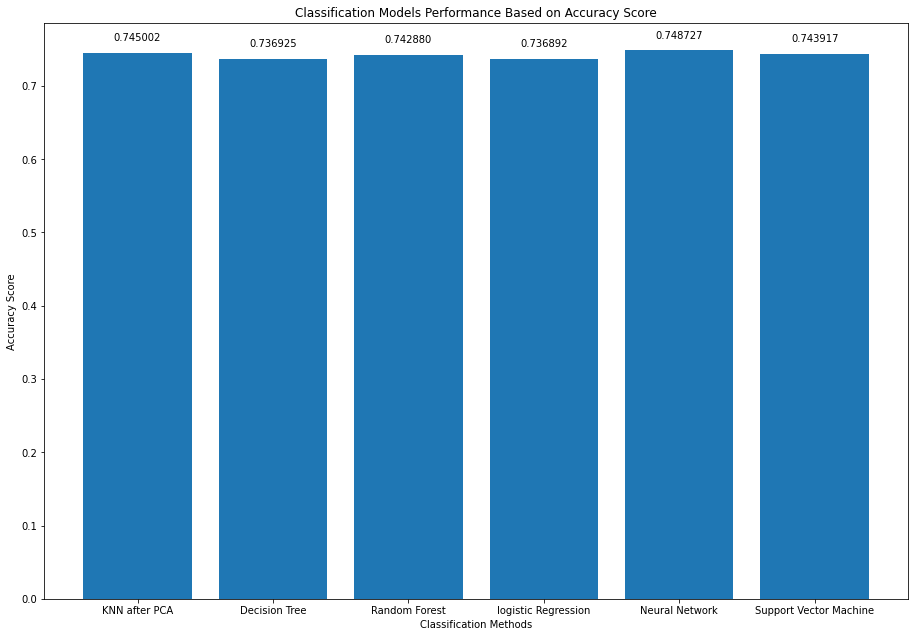

In [ ]:
# Plotting the bar grpah of all classification models performance on this dataset

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
langs = ['KNN after PCA', 'Decision Tree', 'Random Forest','logistic Regression','Neural Network','Support Vector Machine']
result = [0.7450018860807243, 0.7369250021380283,0.7428800452659374,0.7368917389664278, 0.7487268955111279, 0.7439173896642777]
ax.bar(langs,result)
ax.set_ylabel('Accuracy Score');
ax.set_xlabel('Classification Methods');
ax.set_title('Classification Models Performance Based on Accuracy Score');

# formatting of the graph
def add_value_labels(ax, spacing=10):
    
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:2f}".format(y_value)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),         
            textcoords="offset points", 
            ha='center',                
            va=va)  
add_value_labels(ax)
plt.show()

## **The End of this file!**